<a href="https://colab.research.google.com/github/Rahafzsh/NLPLabs/blob/main/NLP_sentiment_analysis_(Case_Study_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to sentiment analysis
Sentiment analysis, also known as opinion mining, is a branch of natural language processing (NLP) that focuses on determining the sentiment or emotional tone expressed in a piece of text. The primary goal is to understand the subjective information present in the text and categorize it as positive, negative, or neutral. Sentiment analysis has gained significant importance in the era of big data, social media, and customer-centric business strategies.

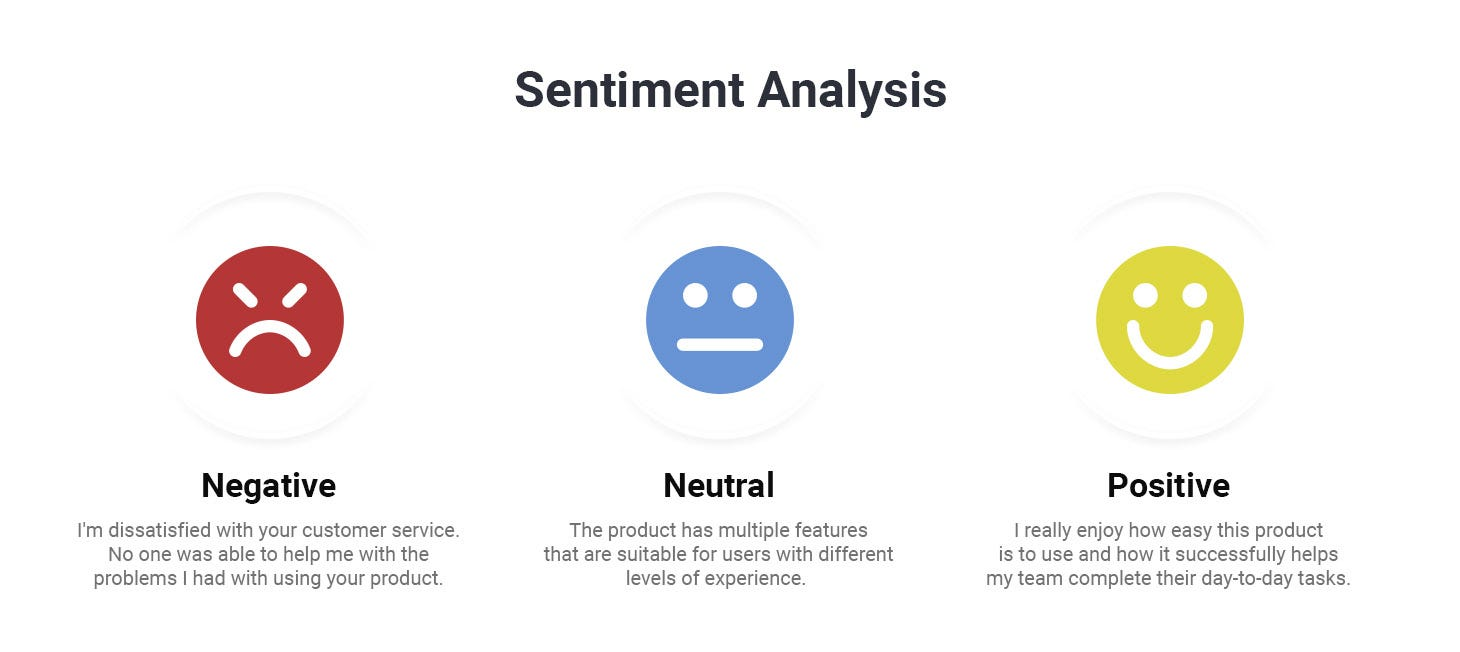

Challenges in Sentiment Analysis:
- Context Understanding:
- Multilingualism
- Ambiguity
- Subjectivity

Applications of Sentiment Analysis:

- Customer Feedback Analysis
- Social Media Monitoring
- Brand Reputation Management
- Market Research
- Political Analysis

In [ ]:
from google.colab import files
upload = files.upload()

In [5]:
# Load your dataset (make sure it has 'text' and 'class' columns)
import pandas as pd

data = pd.read_csv('/content/DisneylandReviews.csv', encoding='latin-1')
data

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
21473,218360884,5,2014-7,Australia,We recently went with our daughters 11 & 16 an...,Disneyland_California
21474,218326400,5,2014-6,Australia,We were unsure what to expect before entering ...,Disneyland_California
21475,218304323,4,2014-7,United States,It was pretty crowded & hotter than normal. O...,Disneyland_California
21476,218300238,3,2014-7,United States,My biggest concern were the number of rides th...,Disneyland_California


In [6]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Drop rows with missing values in the relevant columns
data = data.dropna(subset=['Review_Text', 'Rating'])

# Map star ratings to sentiments
data['Sentiment'] = data['Rating'].apply(lambda rating: 'positive' if rating > 3 else ('negative' if rating < 3 else 'neutral'))

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data['Review_Text'], data['Sentiment'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset size
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

# Train the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(train_vectors, train_labels)

# Predictions on the test set
predictions = svm_classifier.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(test_labels, predictions))


Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

    negative       0.60      0.41      0.49       248
     neutral       0.52      0.16      0.24       474
    positive       0.89      0.99      0.93      3574

    accuracy                           0.86      4296
   macro avg       0.67      0.52      0.56      4296
weighted avg       0.83      0.86      0.83      4296



#Use Case:  Amazon reviews of unlocked phone analysis

The objective of this use case is to conduct sentiment analysis on Amazon reviews of unlocked phones, categorizing reviews into three classes: positive, negative, and neutral. The goal is to gain a comprehensive understanding of customer opinions and sentiments regarding various unlocked phone models.

- Dataset link: https://www.kaggle.com/datasets/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

In [7]:
# Load your dataset (make sure it has 'text' and 'class' columns)
import pandas as pd

data = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv', encoding='latin-1')
data

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
35428,Apple iPhone 5c 8GB Unlocked GSM Smartphone - ...,Apple,115.00,1.0,Phone was NOT NEW as described. Phone stopped ...,14.0
35429,Apple iPhone 5c 8GB Unlocked GSM Smartphone - ...,Apple,115.00,1.0,I recieved it broken and it doesn't charge not...,2.0
35430,Apple iPhone 5c 8GB Unlocked GSM Smartphone - ...,Apple,115.00,5.0,I love my phoneðððð,0.0
35431,Apple iPhone 5c 8GB Unlocked GSM Smartphone - ...,Apple,115.00,1.0,Might be unlucky because this phone itself is ...,2.0


In [9]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Drop rows with missing values in the relevant columns
data = data.dropna(subset=['Reviews', 'Rating'])

# Map star ratings to sentiments
data['Sentiment'] = data['Rating'].apply(lambda rating: 'positive' if rating > 3 else ('negative' if rating < 3 else 'neutral'))

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data['Reviews'], data['Sentiment'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset size
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

# Train the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(train_vectors, train_labels)

# Predictions on the test set
predictions = svm_classifier.predict(test_vectors)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(test_labels, predictions))


Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.92      0.90      1996
     neutral       0.81      0.36      0.50       478
    positive       0.94      0.97      0.95      4610

    accuracy                           0.92      7084
   macro avg       0.87      0.75      0.79      7084
weighted avg       0.91      0.92      0.91      7084

